<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
house.shape

(1460, 81)

In [4]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house.shape

(1460, 81)

In [7]:
house = house[house.MSZoning.isin(['RH','RL','RP','RM'])] #remove any houses that are not residential from the dataset
house.shape

(1385, 81)

In [8]:
house.Street

0       Pave
1       Pave
2       Pave
3       Pave
4       Pave
5       Pave
6       Pave
7       Pave
8       Pave
9       Pave
10      Pave
11      Pave
12      Pave
13      Pave
14      Pave
15      Pave
16      Pave
17      Pave
18      Pave
19      Pave
20      Pave
21      Pave
22      Pave
23      Pave
24      Pave
25      Pave
26      Pave
27      Pave
28      Pave
29      Pave
        ... 
1428    Pave
1429    Pave
1430    Pave
1431    Pave
1432    Pave
1433    Pave
1434    Pave
1435    Pave
1436    Pave
1437    Pave
1438    Pave
1439    Pave
1440    Pave
1441    Pave
1443    Pave
1444    Pave
1445    Pave
1446    Pave
1447    Pave
1448    Pave
1449    Pave
1450    Pave
1451    Pave
1452    Pave
1453    Pave
1455    Pave
1456    Pave
1457    Pave
1458    Pave
1459    Pave
Name: Street, Length: 1385, dtype: object

In [9]:
house.Street.value_counts()

Pave    1381
Grvl       4
Name: Street, dtype: int64

In [10]:
house.Street=house.Street.map(lambda x: 2 if x == 'Grvl' else 1)  
house.Street.value_counts()
#Type of road access to property
       #Grvl	Gravel	1
       #Pave	Paved	2

1    1381
2       4
Name: Street, dtype: int64

In [11]:
#Lvl	Near Flat/Level	1
#  Bnk	Banked - Quick and significant rise from street grade to building	2
# HLS	Hillside - Significant slope from side to side	3
#Low	Depression	4
house.LandContour=house.LandContour.map(lambda x: 1 if x == 'Lvl' else x)
house.LandContour=house.LandContour.map(lambda x: 2 if x == 'Bnk' else x)
house.LandContour=house.LandContour.map(lambda x: 3 if x == 'HLS' else x)
house.LandContour=house.LandContour.map(lambda x: 4 if x == 'Low' else x)
house.LandContour.value_counts()

1    1240
2      62
3      49
4      34
Name: LandContour, dtype: int64

In [12]:
#LotShape: General shape of property
#Reg	Regular	1,IR1	Slightly irregular	2,IR2	Moderately Irregular	3,IR3	Irregular	4
house.LotShape=house.LandContour.map(lambda x: 1 if x == 'Reg' else x)
house.LotShape=house.LandContour.map(lambda x: 2 if x == 'IR1' else x)
house.LotShape=house.LandContour.map(lambda x: 3 if x == 'IR2' else x)
house.LotShape=house.LandContour.map(lambda x: 4 if x == 'IR3' else x)
house.LotShape.value_counts()

1    1240
2      62
3      49
4      34
Name: LotShape, dtype: int64

In [13]:
#Alley: Type of alley access to property, Grvl	Gravel	2,Pave	Paved	1,NA 	No alley access	0
house.Alley=house.Alley.map(lambda x: 1 if x == 'Pave' else x)
house.Alley=house.Alley.map(lambda x: 2 if x == 'Grvl' else x)
house.Alley=house.Alley.map(lambda x: 3 if x == 'NA' else x)
house.Alley.value_counts()

2.0    50
1.0    15
Name: Alley, dtype: int64

In [14]:
#Utilities: Type of utilities available
       #AllPub	All public Utilities (E,G,W,& S)	1
       #NoSewr	Electricity, Gas, and Water (Septic Tank)	-
       #NoSeWa	Electricity and Gas Only	0
       #ELO	Electricity only	-
house.Utilities=house.Utilities.map(lambda x: 1 if x == 'AllPub' else x)
house.Utilities=house.Utilities.map(lambda x: 0 if x == 'NoSeWa' else x)
house.Utilities.value_counts()

1    1384
0       1
Name: Utilities, dtype: int64

In [15]:
#LotConfig: Lot configuration
#Inside	Inside lot	1,Corner	Corner lot	2, CulDSac	Cul-de-sac	3,
#FR2	Frontage on 2 sides of property 	4
#FR3	Frontage on 3 sides of property 	5
house.LotConfig=house.LotConfig.map(lambda x: 1 if x == 'Inside' else x)
house.LotConfig=house.LotConfig.map(lambda x: 2 if x == 'Corner' else x)
house.LotConfig=house.LotConfig.map(lambda x: 3 if x == 'CulDSac' else x)
house.LotConfig=house.LotConfig.map(lambda x: 4 if x == 'FR2' else x)
house.LotConfig=house.LotConfig.map(lambda x: 5 if x == 'FR3' else x)
house.LotConfig.value_counts()

1    991
2    254
3     93
4     44
5      3
Name: LotConfig, dtype: int64

In [16]:
      # LandSlope: Slope of property: # Gtl	Gentle slope	1,# Mod	Moderate Slope	2
      # Sev	Severe Slope	3
house.LandSlope=house.LandSlope.map(lambda x: 1 if x == 'Gtl' else x)
house.LandSlope=house.LandSlope.map(lambda x: 2 if x == 'Mod' else x)
house.LandSlope=house.LandSlope.map(lambda x: 3 if x == 'Sev' else x)
house.LandSlope.value_counts()

1    1310
2      62
3      13
Name: LandSlope, dtype: int64

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [17]:
house.Neighborhood=house.Neighborhood.map(lambda x: 1 if x == 'NAmes' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 2 if x == 'CollgCr' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 3 if x == 'OldTown' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 4 if x == 'Edwards' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 5 if x == 'Gilbert' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 6 if x == 'NridgHt' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 7 if x == 'Sawyer' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 8 if x == 'NWAmes' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 9 if x == 'SawyerW' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 10 if x == 'BrkSide' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 11 if x == 'Crawfor' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 12 if x == 'Mitchel' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 13 if x == 'NoRidge' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 14 if x == 'Timber' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 15 if x == 'ClearCr' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 16 if x == 'IDOTRR' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 17 if x == 'SWISU' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 18 if x == 'StoneBr' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 19 if x == 'Somerst' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 20 if x == 'MeadowV' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 21 if x == 'Blmngtn' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 22 if x == 'BrDale' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 23 if x == 'Veenker' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 24 if x == 'NPkVill' else x)
house.Neighborhood=house.Neighborhood.map(lambda x: 25 if x == 'Blueste' else x)
house.Neighborhood.value_counts()

1     225
2     150
3     112
4     100
5      79
6      77
7      74
8      73
9      59
10     58
11     51
12     49
13     41
14     38
15     28
16     28
17     25
18     25
19     21
20     17
21     17
22     16
23     11
24      9
25      2
Name: Neighborhood, dtype: int64

In [18]:
house.BldgType=house.BldgType.map(lambda x: 1 if x == '1Fam' else x)
house.BldgType=house.BldgType.map(lambda x: 2 if x == 'TwnhsE' else x)
house.BldgType=house.BldgType.map(lambda x: 3 if x == 'Duplex' else x)
house.BldgType=house.BldgType.map(lambda x: 4 if x == 'Twnhs' else x)
house.BldgType=house.BldgType.map(lambda x: 5 if x == '2fmCon' else x)
house.BldgType.value_counts()

1    1173
2      96
3      52
4      34
5      30
Name: BldgType, dtype: int64

In [19]:
house.OverallQual.value_counts()

5     396
6     363
7     283
8     152
4     111
9      41
3      18
10     17
2       2
1       2
Name: OverallQual, dtype: int64

In [20]:
house.OverallCond.value_counts()

5    756
6    248
7    204
8     72
4     54
3     24
9     22
2      4
1      1
Name: OverallCond, dtype: int64

In [21]:
  house.YearBuilt.value_counts().head(10)
        

2006    55
2005    55
2004    48
2007    42
2003    42
1976    33
1977    32
1959    26
1920    26
1998    25
Name: YearBuilt, dtype: int64

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [22]:
house.RoofStyle.value_counts()

Gable      1074
Hip         279
Flat         13
Gambrel      10
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [23]:
house.RoofStyle=house.RoofStyle.map(lambda x: 1 if x == 'Gable' else x)
house.RoofStyle=house.RoofStyle.map(lambda x: 2 if x == 'Hip' else x)
house.RoofStyle=house.RoofStyle.map(lambda x: 3 if x == 'Flat' else x)
house.RoofStyle=house.RoofStyle.map(lambda x: 4 if x == 'Gambrel' else x)
house.RoofStyle=house.RoofStyle.map(lambda x: 5 if x == 'Mansard' else x)
house.RoofStyle=house.RoofStyle.map(lambda x: 6 if x == 'Shed' else x)
house.RoofStyle.value_counts()


1    1074
2     279
3      13
4      10
5       7
6       2
Name: RoofStyle, dtype: int64

In [24]:
house.RoofMatl=house.RoofStyle.map(lambda x: 1 if x == 'ClyTile' else x)
house.RoofMatl=house.RoofStyle.map(lambda x: 2 if x == 'CompShg' else x)
house.RoofMatl=house.RoofStyle.map(lambda x: 3 if x == 'Membran' else x)
house.RoofMatl=house.RoofStyle.map(lambda x: 4 if x == 'Metal' else x)
house.RoofMatl=house.RoofStyle.map(lambda x: 5 if x == 'Roll' else x)
house.RoofMatl=house.RoofStyle.map(lambda x: 6 if x == 'Tar&Grv' else x)
house.RoofMatl=house.RoofStyle.map(lambda x: 7 if x == 'WdShake' else x)
house.RoofMatl=house.RoofStyle.map(lambda x: 8 if x == 'WdShngl' else x)
house.RoofMatl.value_counts()# skewed to only one variable
#RoofMatl: Roof material

 #      ClyTile	Clay or Tile
  #     CompShg	Standard (Composite) Shingle
   #    Membran	Membrane
    #   Metal	Metal
     #  Roll	Roll
      # Tar&Grv	Gravel & Tar
       #WdShake	Wood Shakes
       #WdShngl	Wood Shingles

1    1074
2     279
3      13
4      10
5       7
6       2
Name: RoofMatl, dtype: int64

In [25]:
house.Exterior1st.value_counts()

VinylSd    481
HdBoard    222
Wd Sdng    204
MetalSd    192
Plywood    107
CemntBd     53
BrkFace     49
WdShing     26
Stucco      25
AsbShng     19
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [26]:
house.Exterior1st=house.Exterior1st.map(lambda x: 1 if x == 'VinylSd' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 2 if x == 'HdBoard' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 3 if x == 'Wd Sdng' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 4 if x == 'MetalSd' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 5 if x == 'Plywood' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 6 if x == 'CemntBd' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 7 if x == 'BrkFace' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 8 if x == 'WdShing' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 9 if x == 'Stucco' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 10 if x == 'AsbShng' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 11 if x == 'BrkComm' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 12 if x == 'Stone' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 13 if x == 'CBlock' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 14 if x == 'ImStucc' else x)
house.Exterior1st=house.Exterior1st.map(lambda x: 15 if x == 'AsphShn' else x)
house.Exterior1st.value_counts()


1     481
2     222
3     204
4     192
5     107
6      53
7      49
8      26
9      25
10     19
12      2
11      2
15      1
14      1
13      1
Name: Exterior1st, dtype: int64

 AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [27]:

house.Exterior2nd=house.Exterior2nd.map(lambda x: 1 if x == 'VinylSd' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 2 if x == 'HdBoard' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 3 if x == 'Wd Sdng' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 4 if x == 'MetalSd' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 5 if x == 'Plywood' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 6 if x == 'CmentBd' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 7 if x == 'BrkFace' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 8 if x == 'Wd Shng' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 9 if x == 'Stucco' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 10 if x == 'AsbShng' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 11 if x == 'Brk Cmn' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 12 if x == 'Stone' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 13 if x == 'CBlock' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 14 if x == 'ImStucc' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 15 if x == 'AsphShn' else x)
house.Exterior2nd=house.Exterior2nd.map(lambda x: 16 if x == 'Other' else x)
house.Exterior2nd.value_counts()

1     470
2     207
3     195
4     186
5     141
6      52
8      38
9      26
7      24
10     19
14     10
11      7
12      5
15      3
16      1
13      1
Name: Exterior2nd, dtype: int64

In [28]:
house.ExterQual=house.ExterQual.map(lambda x: 1 if x == 'Ex' else x)
house.ExterQual=house.ExterQual.map(lambda x: 2 if x == 'Gd' else x)
house.ExterQual=house.ExterQual.map(lambda x: 3 if x == 'TA' else x)
house.ExterQual=house.ExterQual.map(lambda x: 4 if x == 'Fa' else x)
house.ExterQual=house.ExterQual.map(lambda x: 4 if x == 'Po' else x)

house.ExterQual.value_counts()
# ExterQual: Evaluates the quality of the material on the exterior 
#		   Ex	Excellent,      Gd	Good,       TA	Average/Typical
       #Fa	Fair,       Po	Poor

3    893
2    432
1     49
4     11
Name: ExterQual, dtype: int64

In [29]:
house.ExterCond=house.ExterCond.map(lambda x: 1 if x == 'Ex' else x)
house.ExterCond=house.ExterCond.map(lambda x: 2 if x == 'Gd' else x)
house.ExterCond=house.ExterCond.map(lambda x: 3 if x == 'TA' else x)
house.ExterCond=house.ExterCond.map(lambda x: 4 if x == 'Fa' else x)
house.ExterCond=house.ExterCond.map(lambda x: 5 if x == 'Po' else x)
house.ExterCond.value_counts()
#ExterCond: Evaluates the present condition of the material on the exterior

   #Ex    Excellent,  #Gd    Good,   TA    Average/Typical
   #Fa    Fair,  Po    Poor

3    1210
2     145
4      26
1       3
5       1
Name: ExterCond, dtype: int64

In [30]:
house.Foundation=house.Foundation.map(lambda x: 1 if x == 'BrkTil' else x)
house.Foundation=house.Foundation.map(lambda x: 2 if x == 'CBlock' else x)
house.Foundation=house.Foundation.map(lambda x: 3 if x == 'PConc' else x)
house.Foundation=house.Foundation.map(lambda x: 4 if x == 'Slab' else x)
house.Foundation=house.Foundation.map(lambda x: 5 if x == 'Stone' else x)
house.Foundation=house.Foundation.map(lambda x: 6 if x == 'Wood' else x)

house.Foundation.value_counts()

#Foundation: Type of foundation

 #  BrkTil    Brick & Tile
  # CBlock    Cinder Block
   #PConc    Poured Contrete    
   #Slab    Slab
   #Stone    Stone
   #Wood    Wood


2    627
3    582
1    144
4     24
5      5
6      3
Name: Foundation, dtype: int64

In [31]:
house.BsmtExposure=house.BsmtExposure.map(lambda x: 1 if x == 'Gd' else x)
house.BsmtExposure=house.BsmtExposure.map(lambda x: 2 if x == 'Av' else x)
house.BsmtExposure=house.BsmtExposure.map(lambda x: 3 if x == 'Mn' else x)
house.BsmtExposure=house.BsmtExposure.map(lambda x: 4 if x == 'No' else x)
house.BsmtExposure=house.BsmtExposure.map(lambda x: 5 if x == 'NA' else x)
house.BsmtExposure.value_counts()

#BsmtExposure: Refers to walkout or garden level walls

 #  Gd    Good Exposure
  # Av    Average Exposure (split levels or foyers typically score average or above)    
   #Mn    Mimimum Exposure
   #No    No Exposure
   #NA    No Basement

4.0    897
2.0    210
1.0    134
3.0    106
Name: BsmtExposure, dtype: int64

In [32]:
house.drop('MasVnrArea',axis=1,inplace=True)

In [33]:
house.BsmtFinType1=house.BsmtFinType1.map(lambda x: 1 if x == 'GLQ' else x)
house.BsmtFinType1=house.BsmtFinType1.map(lambda x: 2 if x == 'ALQ' else x)
house.BsmtFinType1=house.BsmtFinType1.map(lambda x: 3 if x == 'BLQ' else x)
house.BsmtFinType1=house.BsmtFinType1.map(lambda x: 4 if x == 'Rec' else x)
house.BsmtFinType1=house.BsmtFinType1.map(lambda x: 5 if x == 'LwQ' else x)
house.BsmtFinType1=house.BsmtFinType1.map(lambda x: 6 if x == 'Unf' else x)
house.BsmtFinType1=house.BsmtFinType1.map(lambda x: 7 if x == 'NA' else x)


house.BsmtFinType1.value_counts()
#BsmtFinType1: Rating of basement finished area

 #      GLQ	Good Living Quarters
  #     ALQ	Average Living Quarters
   #    BLQ	Below Average Living Quarters	
    #   Rec	Average Rec Room
     #  LwQ	Low Quality
      # Unf	Unfinshed
       #NA	No Basement

6.0    397
1.0    385
2.0    218
3.0    145
4.0    129
5.0     74
Name: BsmtFinType1, dtype: int64

In [34]:
house.BsmtFinType2=house.BsmtFinType2.map(lambda x: 1 if x == 'GLQ' else x)
house.BsmtFinType2=house.BsmtFinType2.map(lambda x: 2 if x == 'ALQ' else x)
house.BsmtFinType2=house.BsmtFinType2.map(lambda x: 3 if x == 'BLQ' else x)
house.BsmtFinType2=house.BsmtFinType2.map(lambda x: 4 if x == 'Rec' else x)
house.BsmtFinType2=house.BsmtFinType2.map(lambda x: 5 if x == 'LwQ' else x)
house.BsmtFinType2=house.BsmtFinType2.map(lambda x: 6 if x == 'Unf' else x)
house.BsmtFinType2=house.BsmtFinType2.map(lambda x: 7 if x == 'NA' else x)


house.BsmtFinType2.value_counts()

#BsmtFinType2: Rating of basement finished area (if multiple types)
#
#       GLQ	Good Living Quarters
 #      ALQ	Average Living Quarters
  #     BLQ	Below Average Living Quarters	
   #    Rec	Average Rec Room
    #   LwQ	Low Quality
     #  Unf	Unfinshed
      # NA	No Basement

6.0    1181
4.0      54
5.0      46
3.0      33
2.0      19
1.0      14
Name: BsmtFinType2, dtype: int64

In [35]:
house.TotalBsmtSF.sum() #TotalBsmtSF: Total square feet of basement area

1471727

In [36]:

house.Heating=house.Heating.map(lambda x: 1 if x == 'Floor' else x)
house.Heating=house.Heating.map(lambda x: 2 if x == 'GasA' else x)
house.Heating=house.Heating.map(lambda x: 3 if x == 'GasW' else x)
house.Heating=house.Heating.map(lambda x: 4 if x == 'Grav' else x)
house.Heating=house.Heating.map(lambda x: 5 if x == 'OthW' else x)
house.Heating=house.Heating.map(lambda x: 6 if x == 'Wall' else x)
print(house.Heating.value_counts())
#Heating: Type of heating
3		
 #      Floor	Floor Furnace
  #     GasA	Gas forced warm air furnace
   #    GasW	Gas hot water or steam heat
   #    Grav	Gravity furnace	
    #  OthW	Hot water or steam heat other than gas
    #  Wall	Wall furnace

2    1354
3      17
4       7
6       4
5       2
1       1
Name: Heating, dtype: int64


3

In [37]:

house.CentralAir=house.CentralAir.map(lambda x: 1 if x == 'Yes' else x)
house.CentralAir=house.CentralAir.map(lambda x: 2 if x == 'No' else x)
house.CentralAir.value_counts()
#CentralAir: Central air conditioning

 #      N	No
  #     Y	Yes

Y    1296
N      89
Name: CentralAir, dtype: int64

In [38]:
house.drop('Electrical',axis=1,inplace=True)
#Electrical: Electrical system

 #      SBrkr	Standard Circuit Breakers & Romex
  #     FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
   #    FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
    #   FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
     #  Mix	Mixed

In [39]:
#1stFlrSF: First Floor square feet, rename it to FstFlsf to be able to use it
#2ndFlrSF: Second floor square feet,rename it to SndFlsf
house.rename(columns={
        '1stFlrSF':'FstFlsf',
            }, inplace=True)

house.rename(columns={
        '2stFlrSF':'SndFlsf',
            }, inplace=True)



In [40]:
house.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'FstFlsf', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF

In [41]:
house.BedroomAbvGr.value_counts()

3    766
2    328
4    209
1     47
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [42]:
house.KitchenQual=house.KitchenQual.map(lambda x: 1 if x == 'Ex' else x)
house.KitchenQual=house.KitchenQual.map(lambda x: 2 if x == 'Gd' else x)
house.KitchenQual=house.KitchenQual.map(lambda x: 3 if x == 'TA' else x)
house.KitchenQual=house.KitchenQual.map(lambda x: 4 if x == 'Fa' else x)
house.KitchenQual=house.KitchenQual.map(lambda x: 5 if x == 'Po' else x)

house.KitchenQual.value_counts()
#      Ex	Excellent, Gd	Good, TA	Typical/Average,Fa	Fair,Po	Poor

3    723
2    529
1     96
4     37
Name: KitchenQual, dtype: int64

In [43]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
house.TotRmsAbvGrd.value_counts()

6     385
7     311
5     263
8     180
4      82
9      71
10     46
11     17
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [44]:
house.Functional=house.Functional.map(lambda x: 1 if x == 'Typ' else x)
house.Functional=house.Functional.map(lambda x: 2 if x == 'Min1' else x)
house.Functional=house.Functional.map(lambda x: 3 if x == 'Min2' else x)
house.Functional=house.Functional.map(lambda x: 4 if x == 'Mod' else x)
house.Functional=house.Functional.map(lambda x: 5 if x == 'Maj1' else x)
house.Functional=house.Functional.map(lambda x: 6 if x == 'Maj2' else x)
house.Functional=house.Functional.map(lambda x: 7 if x == 'Sev' else x)
house.Functional=house.Functional.map(lambda x: 8 if x == 'Sal' else x)
house.Functional.value_counts()

#Functional: Home functionality (Assume typical unless deductions are warranted)

      # Typ	Typical Functionality,  Min1	Minor Deductions 1,  Min2	Minor Deductions 2,  Mod	Moderate Deductions
       #Maj1	Major Deductions 1,     Maj2	Major Deductions 2,       Sev	Severely Damaged,       Sal	Salvage only






1    1285
3      34
2      31
4      15
5      14
6       5
7       1
Name: Functional, dtype: int64

In [45]:
#Condition1: Proximity to various conditions
	
 #      Artery	Adjacent to arterial street
  #     Feedr	Adjacent to feeder street	
   #    Norm	Normal	
    #   RRNn	Within 200' of North-South Railroad
     #  RRAn	Adjacent to North-South Railroad
      # PosN	Near positive off-site feature--park, greenbelt, etc.
       #PosA	Adjacent to postive off-site feature
       #RRNe	Within 200' of East-West Railroad
       #RRAe	Adjacent to East-West Railroad

In [46]:
house.Condition1=house.Condition1.map(lambda x: 1 if x == 'Artery' else x)
house.Condition1=house.Condition1.map(lambda x: 2 if x == 'Feedr' else x)
house.Condition1=house.Condition1.map(lambda x: 3 if x == 'Norm' else x)
house.Condition1=house.Condition1.map(lambda x: 4 if x == 'RRNn' else x)
house.Condition1=house.Condition1.map(lambda x: 5 if x == 'RRAn' else x)
house.Condition1=house.Condition1.map(lambda x: 6 if x == 'PosN' else x)
house.Condition1=house.Condition1.map(lambda x: 7 if x == 'PosA' else x)
house.Condition1=house.Condition1.map(lambda x: 8 if x == 'RRNe' else x)
house.Condition1=house.Condition1.map(lambda x: 9 if x == 'RRAe' else x)
house.Condition1.value_counts()


3    1188
2      79
1      48
5      25
6      19
9      11
7       8
4       5
8       2
Name: Condition1, dtype: int64

In [47]:
house.HouseStyle.value_counts()


1Story    704
2Story    397
1.5Fin    150
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     10
2.5Fin      8
Name: HouseStyle, dtype: int64

In [48]:
house.HouseStyle=house.HouseStyle.map(lambda x: 1 if x == '1Story' else x)
house.HouseStyle=house.HouseStyle.map(lambda x: 2 if x == '1.5Fin' else x)
house.HouseStyle=house.HouseStyle.map(lambda x: 3 if x == '1.5Unf' else x)
house.HouseStyle=house.HouseStyle.map(lambda x: 4 if x == '2Story' else x)
house.HouseStyle=house.HouseStyle.map(lambda x: 5 if x == '2.5Fin' else x)
house.HouseStyle=house.HouseStyle.map(lambda x: 6 if x == '2.5Unf' else x)
house.HouseStyle=house.HouseStyle.map(lambda x: 7 if x == 'SFoyer' else x)
house.HouseStyle=house.HouseStyle.map(lambda x: 8 if x == 'SLvl' else x)
house.HouseStyle.value_counts()
#HouseStyle: Style of dwelling
#      1Story	One story
 #      1.5Fin	One and one-half story: 2nd level finished
  #     1.5Unf	One and one-half story: 2nd level unfinished
  #   2Story	Two story
   #2.5Fin	Two and one-half story: 2nd level finished
    #   2.5Unf	Two and one-half story: 2nd level unfinished
     #  SFoyer	Split Foyer
      # SLvl	Split Level

1    704
4    397
2    150
8     65
7     37
3     14
6     10
5      8
Name: HouseStyle, dtype: int64

In [49]:
house.GarageCars.value_counts()   #GarageCars: Size of garage in car capacity

2    764
1    365
3    172
0     79
4      5
Name: GarageCars, dtype: int64

In [50]:
house.BsmtCond.value_counts()
#house.HouseStyle=house.HouseStyle.map(lambda x: 1 if x == '1Story' else x)
#BsmtCond: Evaluates the general condition of the basement

       #Ex	Excellent(1), Gd	Good(2),TA	Typical(3) - slight dampness allowed,Fa	Fair - dampness or some cracking or settling
       #Po	Poor, - Severe cracking, settling, or wetness
       #NA	No Basement
house.BsmtCond=house.BsmtCond.map(lambda x: 1 if x == 'Ex' else x)   
house.BsmtCond=house.BsmtCond.map(lambda x: 2 if x == 'Gd' else x)
house.BsmtCond=house.BsmtCond.map(lambda x: 3 if x == 'TA' else x)
house.BsmtCond=house.BsmtCond.map(lambda x: 4 if x == 'Fa' else x)
house.BsmtCond=house.BsmtCond.map(lambda x: 5 if x == 'Po' else x)
house.BsmtCond.value_counts()

3.0    1242
2.0      61
4.0      43
5.0       2
Name: BsmtCond, dtype: int64

In [51]:

house.GarageType=house.GarageType.map(lambda x: 1 if x == '2Types' else x) 
house.GarageType=house.GarageType.map(lambda x: 2 if x == 'Attchd' else x) 
house.GarageType=house.GarageType.map(lambda x: 3 if x == 'Basment' else x) 
house.GarageType=house.GarageType.map(lambda x: 4 if x == 'BuiltIn' else x) 
house.GarageType=house.GarageType.map(lambda x: 5 if x == 'CarPort' else x) 
house.GarageType=house.GarageType.map(lambda x: 6 if x == 'Detchd' else x) 
house.GarageType=house.GarageType.map(lambda x: 6 if x == 'NA' else x) 

house.GarageType.value_counts()

#GarageType: Garage location
#		
 #      2Types	More than one type of garage
  #     Attchd	Attached to home
   #    Basment	Basement Garage
    #   BuiltIn	Built-In (Garage part of house - typically has room above garage)
     #  CarPort	Car Port
      # Detchd	Detached from home
       #NA	No Garage

2.0    830
6.0    359
4.0     85
3.0     18
5.0      8
1.0      6
Name: GarageType, dtype: int64

In [52]:
house.CentralAir=house.CentralAir.map(lambda x: 1 if x == 'Y' else 2) 
house.CentralAir.value_counts()
#y:1,no:2

1    1296
2      89
Name: CentralAir, dtype: int64

In [53]:
#GarageQual: Garage quality

       #Ex	Excellent,Gd	Good,TA	Typical/Average, Fa	Fair,Po	Poor,NA	No Garage-all garages had atleat a quality garage ,so dropped hte garage
house.GarageQual.value_counts()
#house.drop('GarageQual',inplace=True,axis=1)
#house.drop('GarageCond',inplace=True,axis=1)
house.drop('PavedDrive',inplace=True,axis=1)
house.drop('WoodDeckSF',inplace=True,axis=1)
house.drop('OpenPorchSF',inplace=True,axis=1)
house.drop('EnclosedPorch',inplace=True,axis=1)
house.drop('3SsnPorch',inplace=True,axis=1)

house.drop('ScreenPorch',inplace=True,axis=1)
house.drop('PoolArea',inplace=True,axis=1)
house.drop('Fence',inplace=True,axis=1)#1108 missed cells
house.drop('MoSold',inplace=True,axis=1)
#house.drop('YrSold',inplace=True,axis=1)
house.drop('SaleType',inplace=True,axis=1)
house.drop('SaleCondition',inplace=True,axis=1)
house.drop('PoolQC',inplace=True,axis=1) #full of NAN
house.drop('MiscFeature',inplace=True,axis=1)#1331 null values
house.drop('Alley',inplace=True,axis=1)# 1320 missing value
house.drop('LotFrontage',inplace=True,axis=1)
house.drop('BsmtQual',inplace=True,axis=1)# Evaluates the height of the basement
house.drop('MSZoning',inplace=True,axis=1)#MSZoning: Identifies the general zoning classification of the sale. already picked residential only
house.drop('Condition2',inplace=True,axis=1)#most of them are normal(1371)
house.drop('MasVnrType',inplace=True,axis=1)
#house.drop('HeatingQC',inplace=True,axis=1)
#house.drop('CentralAir',inplace=True,axis=1)
house.drop('Fireplaces',inplace=True,axis=1)
#house.drop('FireplaceQu',inplace=True,axis=1)
#house.drop('GarageType',inplace=True,axis=1)
house.drop('GarageYrBlt',inplace=True,axis=1)
house.drop('GarageFinish',inplace=True,axis=1)
#house.drop('GarageArea',inplace=True,axis=1) #GarageArea: Size of garage in square feet
#BsmtFullBath: Basement full bathrooms
house.drop('BsmtFullBath',inplace=True,axis=1)
house.drop('BsmtHalfBath',inplace=True,axis=1)
house.drop('HalfBath',inplace=True,axis=1)
#house.drop('KitchenAbvGr',inplace=True,axis=1)
#BsmtFinSF1: Type 1 finished square feet
house.drop('BsmtFinSF1',axis=1,inplace=True)
house.drop('Id',axis=1,inplace=True)
#LowQualFinSF: Low quality finished square feet (all floors)
house.drop('LowQualFinSF',inplace=True,axis=1)
#BsmtFinSF2: Type 2 finished square feet
house.drop('BsmtFinSF2',axis=1,inplace=True)
#BsmtUnfSF: Unfinished square feet of basement area
house.drop('BsmtUnfSF',axis=1,inplace=True)

#Can use this function as well
 #def _drop_unused_cols(self, df):
  #      for col in ['PavedDrive', 'WoodDeckSF', ''OpenPorchSF', 'EnclosedPorch', '3SsnPorch']:
   #         try:
    #            df.drop(col, axis=1, inplace=True)
     #       except:
      #          pass

In [54]:
house.KitchenAbvGr.value_counts()

1    1318
2      64
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [55]:
house.GarageQual=house.GarageQual.map(lambda x: 1 if x == 'Ex' else x) 
house.GarageQual=house.GarageQual.map(lambda x: 2 if x == 'Gd' else x) 
house.GarageQual=house.GarageQual.map(lambda x: 3 if x == 'TA' else x) 
house.GarageQual=house.GarageQual.map(lambda x: 4 if x == 'Fa' else x) 
house.GarageQual=house.GarageQual.map(lambda x: 5 if x == 'Po' else x) 
house.GarageQual=house.GarageQual.map(lambda x: 6 if x == 'Na' else x) 
print(house.GarageQual.value_counts())
#GarageQual: Garage quality

      # Ex	Excellent, Gd	Good,TA	Typical/Average
       #Fa	Fair,Po	Poor,NA	No Garage

3.0    1238
4.0      48
2.0      14
5.0       3
1.0       3
Name: GarageQual, dtype: int64


In [56]:
house.GarageCond=house.GarageCond.map(lambda x: 1 if x == 'Ex' else x) 
house.GarageCond=house.GarageCond.map(lambda x: 2 if x == 'Gd' else x) 
house.GarageCond=house.GarageCond.map(lambda x: 3 if x == 'TA' else x) 
house.GarageCond=house.GarageCond.map(lambda x: 4 if x == 'Fa' else x) 
house.GarageCond=house.GarageCond.map(lambda x: 5 if x == 'Po' else x) 
house.GarageCond=house.GarageCond.map(lambda x: 6 if x == 'Fa' else x) 

house.GarageCond.value_counts()

#GarageCond: 

       #Ex	Excellent, Gd	Good
      # TA	Typical/Average,Fa	Fair
      # Po	Poor,NA	No Garage
   

3.0    1254
4.0      34
2.0       9
5.0       7
1.0       2
Name: GarageCond, dtype: int64

In [57]:
house.HeatingQC=house.HeatingQC.map(lambda x: 1 if x == 'Ex' else x) 
house.HeatingQC=house.HeatingQC.map(lambda x: 2 if x == 'Gd' else x) 
house.HeatingQC=house.HeatingQC.map(lambda x: 3 if x == 'TA' else x) 
house.HeatingQC=house.HeatingQC.map(lambda x: 4 if x == 'Fa' else x)
house.HeatingQC=house.HeatingQC.map(lambda x: 5 if x == 'Po' else x)


house.HeatingQC.value_counts()
#HeatingQC: Heating quality and condition

 #      Ex	Excellent,       Gd	Good,       TA	Average/Typical
   #    Fa	Fair,    Po	Poor

1    681
3    421
2    233
4     49
5      1
Name: HeatingQC, dtype: int64

In [58]:
house.FireplaceQu=house.FireplaceQu.map(lambda x: 1 if x == 'Ex' else x) 
house.FireplaceQu=house.FireplaceQu.map(lambda x: 2 if x == 'Gd' else x) 
house.FireplaceQu=house.FireplaceQu.map(lambda x: 3 if x == 'TA' else x) 
house.FireplaceQu=house.FireplaceQu.map(lambda x: 4 if x == 'Fa' else x)
house.FireplaceQu=house.FireplaceQu.map(lambda x: 5 if x == 'Po' else x)

house.FireplaceQu.value_counts()
#HeatingQC: Heating quality and condition

       #Ex	Excellent,   Gd	Good
       #TA	Average/Typical,Fa	Fair
      # Po	Poor

2.0    363
3.0    306
4.0     32
1.0     23
5.0     20
Name: FireplaceQu, dtype: int64

In [59]:
house.describe()

,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,MiscVal,YrSold,SalePrice
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,744.000000,1306.000000,1385.000000,1385.000000,1306.000000,1306.000000,1385.000000,1385.000000,1385.000000
mean,55.328520,10706.158845,1.002888,1.189170,1.189170,0.999278,1.421661,1.063538,7.404332,3.032491,...,1.166787,2.547043,3.257274,1.753791,467.954513,3.026034,3.026799,45.400722,2007.810830,180136.283032
std,40.883271,10185.732173,0.053683,0.609675,0.609675,0.026870,0.771489,0.279875,5.974269,0.899397,...,0.684507,0.746777,1.775861,0.755061,213.762881,0.255386,0.244576,509.097441,1.326813,79906.363281
min,20.000000,1300.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2006.000000,37900.000000
25%,20.000000,7711.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,2.000000,2.000000,1.000000,312.000000,3.000000,3.000000,0.000000,2007.000000,129000.000000
50%,50.000000,9591.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,...,1.000000,2.000000,2.000000,2.000000,472.000000,3.000000,3.000000,0.000000,2008.000000,160000.000000
75%,70.000000,11751.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.000000,3.000000,...,1.000000,3.000000,6.000000,2.000000,576.000000,3.000000,3.000000,0.000000,2009.000000,212900.000000
max,190.000000,215245.000000,2.000000,4.000000,4.000000,1.000000,5.000000,3.000000,25.000000,9.000000,...,7.000000,5.000000,6.000000,4.000000,1418.000000,5.000000,5.000000,15500.000000,2010.000000,755000.000000


# Check the types of variables

In [60]:
house.dtypes

MSSubClass        int64
LotArea           int64
Street            int64
LotShape          int64
LandContour       int64
Utilities         int64
LotConfig         int64
LandSlope         int64
Neighborhood      int64
Condition1        int64
BldgType          int64
HouseStyle        int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle         int64
RoofMatl          int64
Exterior1st       int64
Exterior2nd       int64
ExterQual         int64
ExterCond         int64
Foundation        int64
BsmtCond        float64
BsmtExposure    float64
BsmtFinType1    float64
BsmtFinType2    float64
TotalBsmtSF       int64
Heating           int64
HeatingQC         int64
CentralAir        int64
FstFlsf           int64
2ndFlrSF          int64
GrLivArea         int64
FullBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual       int64
TotRmsAbvGrd      int64
Functional        int64
FireplaceQu     float64
GarageType      

# Dealing with null values

In [61]:
house.isnull().sum()

MSSubClass        0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
FstFlsf           0
2ndFlrSF          0
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
FireplaceQu     641
GarageType       79
GarageCars        0
GarageArea        0
GarageQual       79
GarageCond       79
MiscVal           0
YrSold            0
SalePrice         0
dtype: int64

In [62]:
def impute_medians(df, cols=[]): #use median to replace null values
    for col in cols:
        mval = df[col].median()
        df.loc[df[col].isnull(), col] = mval
    return df

house = house.groupby('YrSold').apply(impute_medians, cols=['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtCond','FireplaceQu','GarageType','GarageQual','GarageCond'])




# To standardize the data

In [63]:
!pip install mlxtend #use it to standardize the data

Invalid requirement: '#use'
Traceback (most recent call last):
  File "c:\users\jasper\downloads\download\anaconda\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "c:\users\jasper\downloads\download\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "c:\users\jasper\downloads\download\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "c:\users\jasper\downloads\download\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "c:\users\jasper\downloads\download\anaconda\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "c:\users\jasper\downloads\download\anaconda\lib\site-packages\pip\_vend

In [64]:
#Need to standardize the data inorder to check their correlation as each column has different measurement like ordinal, nominal 
# Import required modules
import pandas as pd
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline
from mlxtend.preprocessing import standardize
house_stand=standardize(house)

In [65]:
house.shape

(1385, 49)

In [66]:
house.describe()

,MSSubClass,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,FireplaceQu,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,MiscVal,YrSold,SalePrice
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,55.328520,10706.158845,1.002888,1.189170,1.189170,0.999278,1.421661,1.063538,7.404332,3.032491,...,1.166787,2.460650,3.185560,1.753791,467.954513,3.024549,3.025271,45.400722,2007.810830,180136.283032
std,40.883271,10185.732173,0.053683,0.609675,0.609675,0.026870,0.771489,0.279875,5.974269,0.899397,...,0.684507,0.644062,1.748928,0.755061,213.762881,0.248064,0.237575,509.097441,1.326813,79906.363281
min,20.000000,1300.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2006.000000,37900.000000
25%,20.000000,7711.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,...,1.000000,2.000000,2.000000,1.000000,312.000000,3.000000,3.000000,0.000000,2007.000000,129000.000000
50%,50.000000,9591.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,...,1.000000,2.000000,2.000000,2.000000,472.000000,3.000000,3.000000,0.000000,2008.000000,160000.000000
75%,70.000000,11751.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.000000,3.000000,...,1.000000,3.000000,6.000000,2.000000,576.000000,3.000000,3.000000,0.000000,2009.000000,212900.000000
max,190.000000,215245.000000,2.000000,4.000000,4.000000,1.000000,5.000000,3.000000,25.000000,9.000000,...,7.000000,5.000000,6.000000,4.000000,1418.000000,5.000000,5.000000,15500.000000,2010.000000,755000.000000


In [67]:
cal=house[['SalePrice','YrSold','Neighborhood']]
cal[cal.SalePrice > cal.SalePrice.mean()].sort_values(by='SalePrice',ascending=False).groupby(['YrSold']).head(5)
#interesting to see the  most  expensive houses were sold in Nordrige (suburb)

,SalePrice,YrSold,Neighborhood
691,755000,2007,13
1182,745000,2007,13
1169,625000,2006,13
898,611657,2010,6
803,582933,2009,6
1046,556581,2006,18
440,555000,2009,6
769,538000,2010,18
178,501837,2009,18
798,485000,2009,6


# Correlation matrix heatmap

In [68]:
# i'll make a handy correlation matrix heatmap for my  measures:

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(16,14))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()







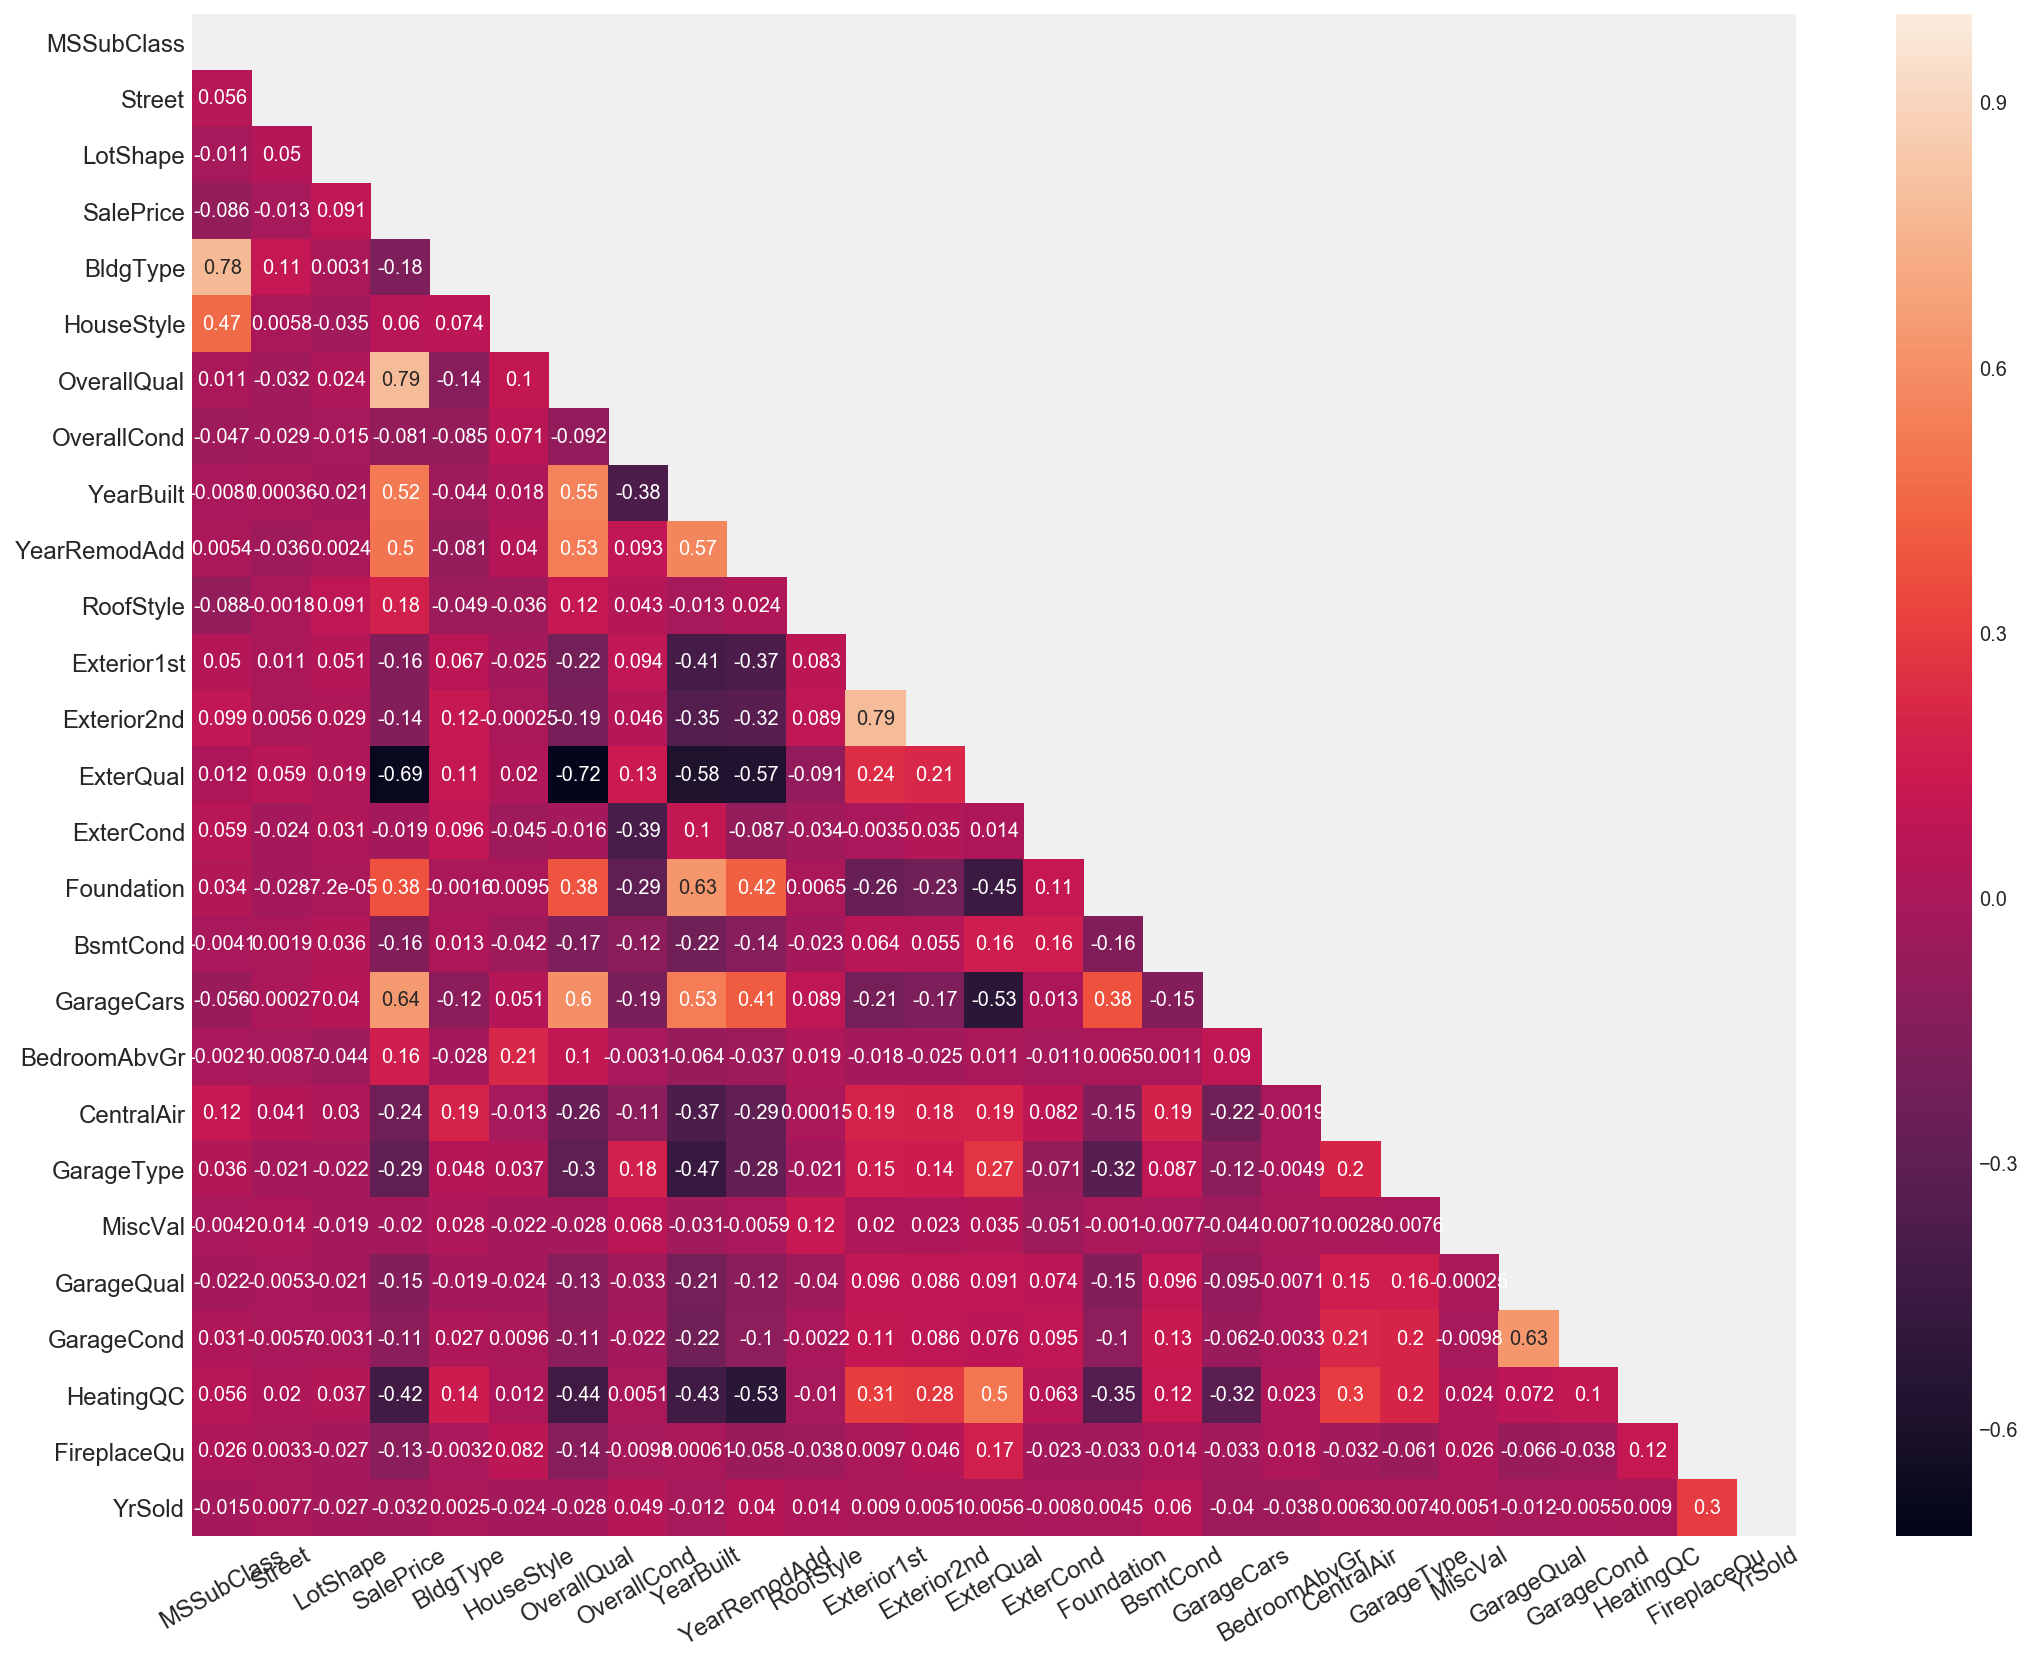

In [69]:
correlation_heat_map(house_stand[['MSSubClass','Street','LotShape','SalePrice', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
      'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual','ExterCond', 'Foundation', 'BsmtCond','GarageCars','BedroomAbvGr','CentralAir','GarageType','MiscVal','GarageQual','GarageCond','HeatingQC','FireplaceQu','YrSold']])

the plan is to use sale price as the target variable .So we need to check what variable may have high relationship with it.
Having looked at te correlation between Saleprice and other variables, I found out  these variables
Garage cars,ExterQual,YearRemodAdd,YearBuilt have high correlation with Sales price

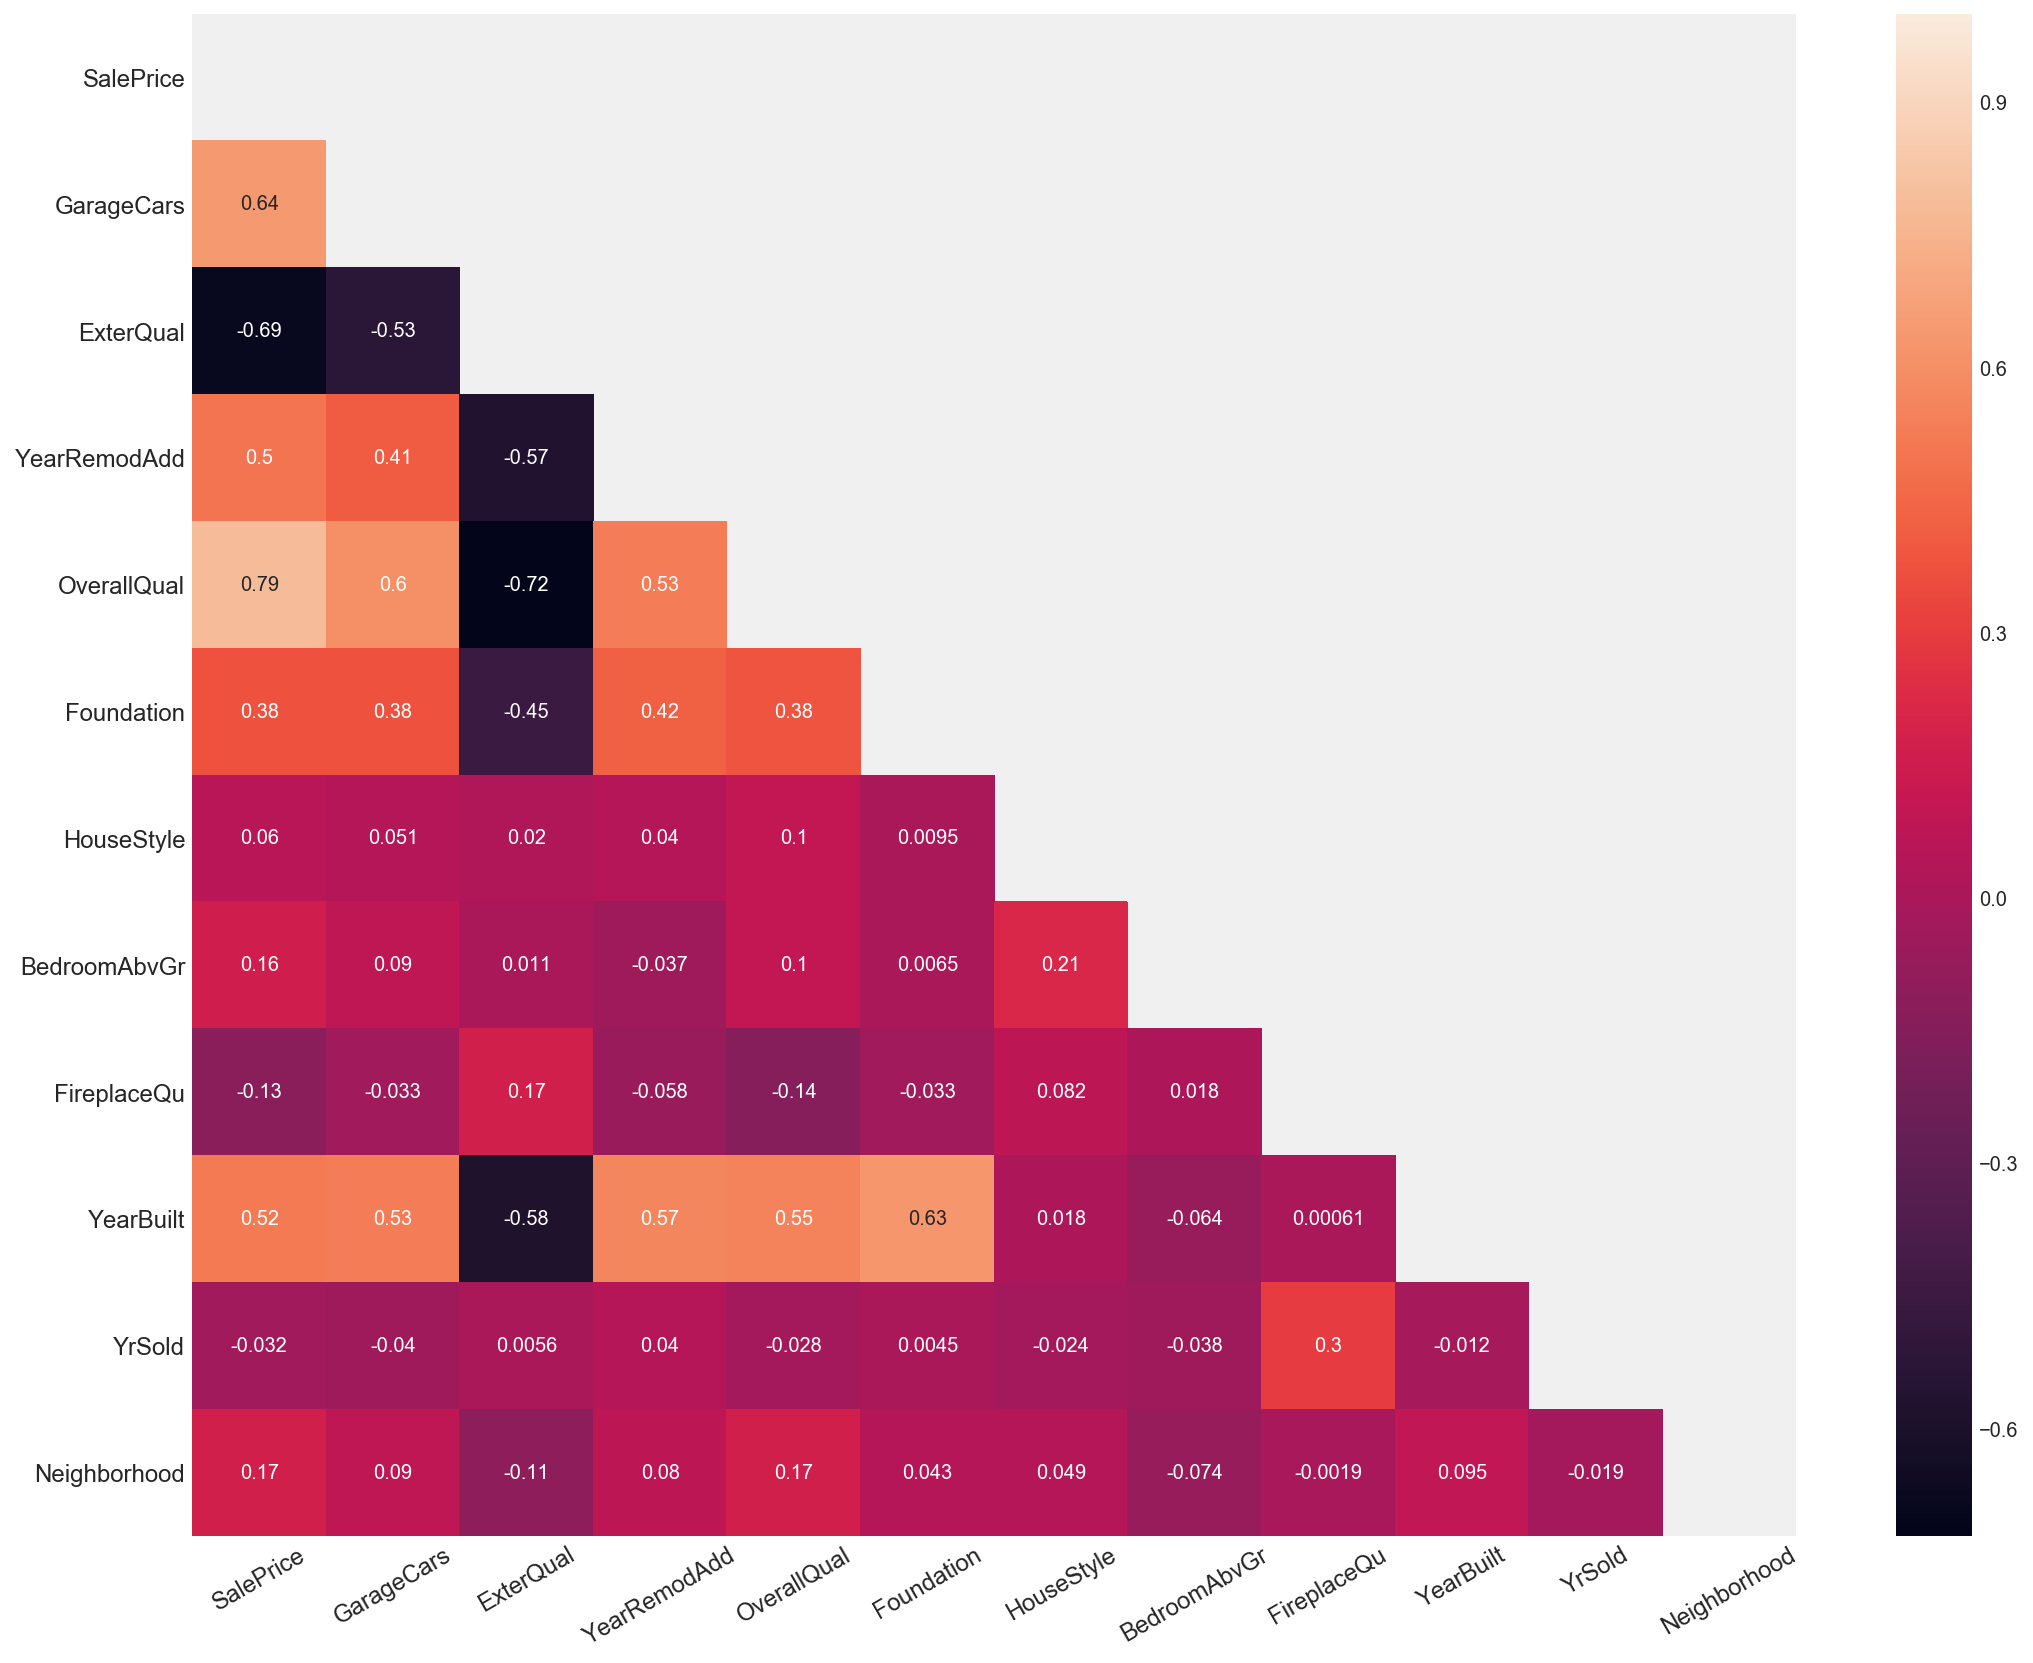

In [70]:
#another heatmap is used to check the correlation
correlation_heat_map(house_stand[['SalePrice','GarageCars','ExterQual','YearRemodAdd','OverallQual','Foundation','HouseStyle','BedroomAbvGr','FireplaceQu','YearBuilt','YrSold','Neighborhood']])

In [71]:
data=house_stand.filter(['SalePrice','GarageCars','ExterQual','YearRemodAdd','YearBuilt','OverallQual','Foundation','HouseStyle','BedroomAbvGr','Neighborhood'],axis=1)


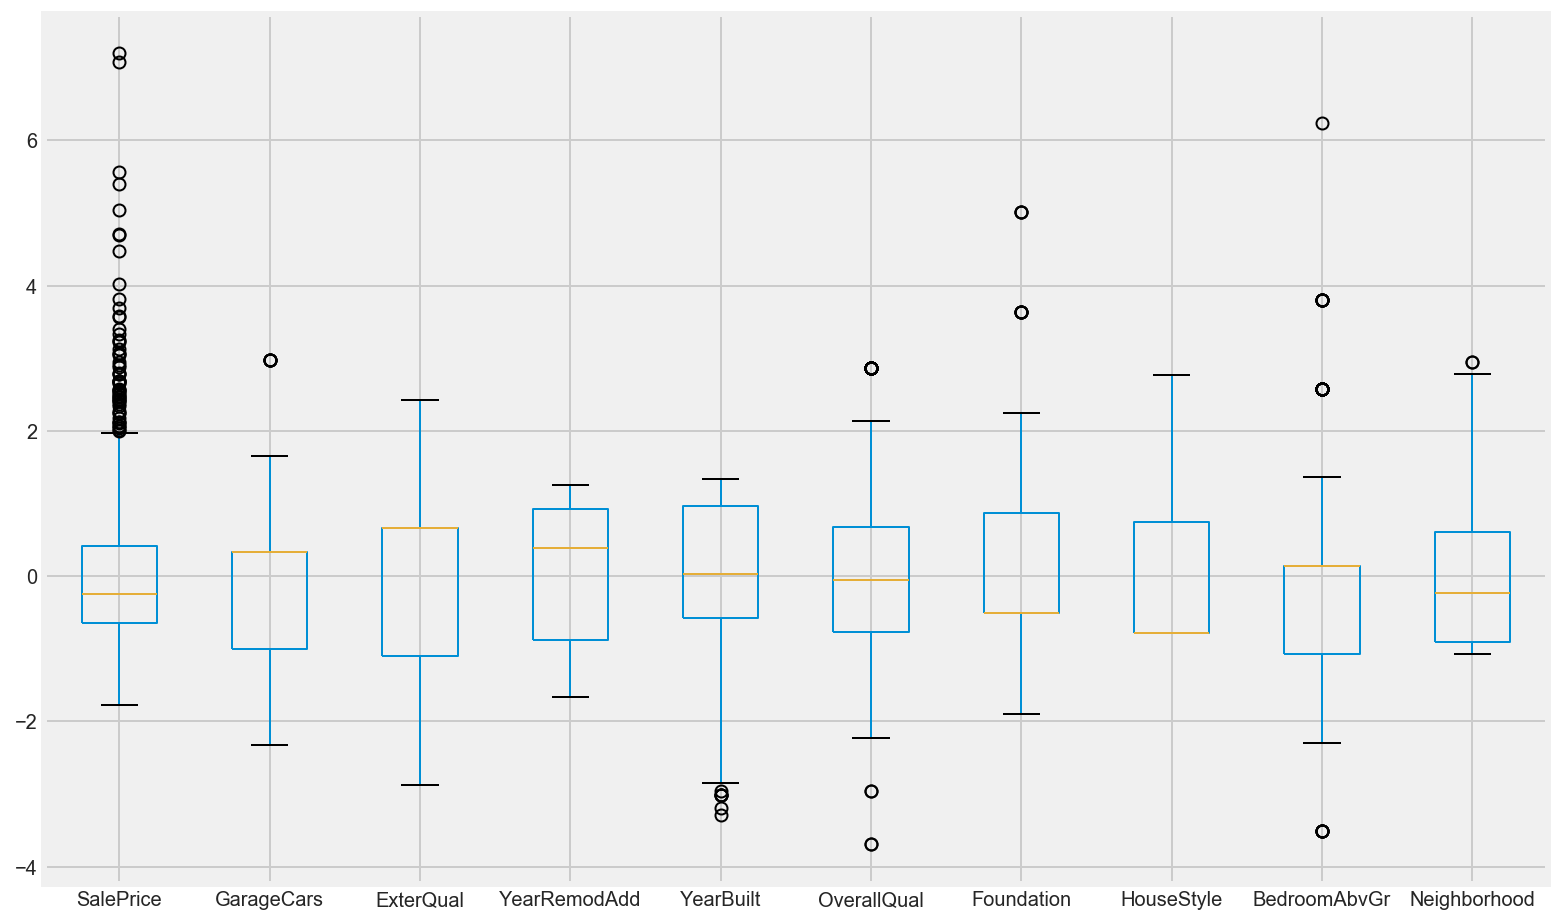

In [72]:
data.plot(kind='box',figsize=(12,8)) 
plt.show()

To check the if there is an outlier,Bedroom above grade or overal quality are ordinal variables and having outliers is not a big issue,outliers for salesprice cannot eb a big issue as the price of house is varied

# Ridge used to predict SalePrice

# Train -Test-Fit the model

In [73]:
house['SalePrice_log']= np.log(house.SalePrice)
predictors = ['GarageCars',  'YearRemodAdd', 'YearBuilt', 'Foundation', 'HouseStyle', 'BedroomAbvGr','Neighborhood']


X_train=house[house['YrSold'] <2010]

X_train=X_train[predictors]
ss = StandardScaler()
X_train = ss.fit_transform(X_train)# use the "fit_transform" function to standardize the X design matrix


y_train=house[house['YrSold'] <2010]
y_train=y_train.SalePrice_log.values


X_test=house[house['YrSold'] ==2010]
X_test=X_test[predictors]
X_test = ss.transform(X_test)# we have already fit ther model ,so inorder to standradize in the same way, we need to not fit it again

y_test=house[house['YrSold'] ==2010]
y_test=y_test.SalePrice_log.values




# Optimal Alpha

In [74]:
#Find an optimal value for Ridge regression alpha using RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

38.27494478516313


# Predicting SalePrice

In [75]:
ridge_pred = optimal_ridge.predict(X_test)

optimal_ridge.score(X_test, y_test) #optimal score islike r2_score(#from sklearn.metrics import r2_score,r2_score(y_test,ridge_pred))
#r_square about.6 is quite good means fixed variables could explain 60%variance for SalePrice

0.6093704897101043

In [76]:
list(zip(optimal_ridge.coef_, predictors)) #Gragae ,Year Remodadded hve strong impact on the price of houses

[(0.17141608002661338, 'GarageCars'),
 (0.10295242201929727, 'YearRemodAdd'),
 (0.07680247121952696, 'YearBuilt'),
 (-0.0023145657255302567, 'Foundation'),
 (0.006430134082913929, 'HouseStyle'),
 (0.07432799266715731, 'BedroomAbvGr'),
 (0.03134946217147804, 'Neighborhood')]

AxesSubplot(0.08,0.125;0.87x0.755) <seaborn.axisgrid.JointGrid object at 0x0000021C7A423EB8>


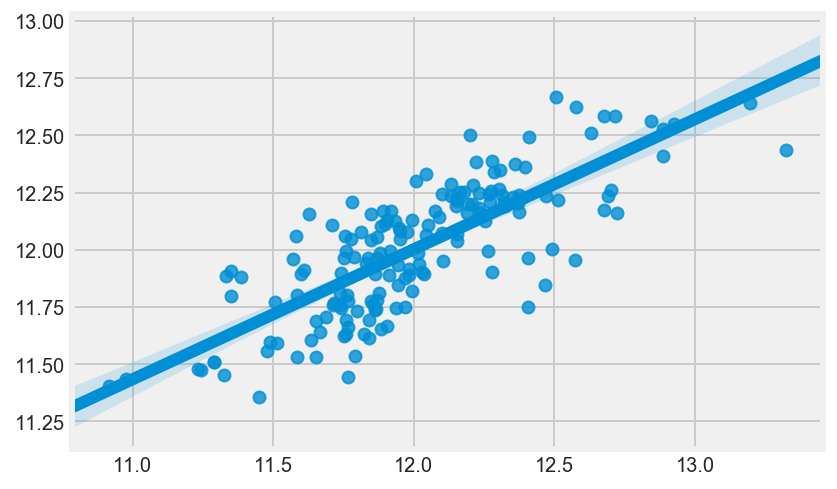

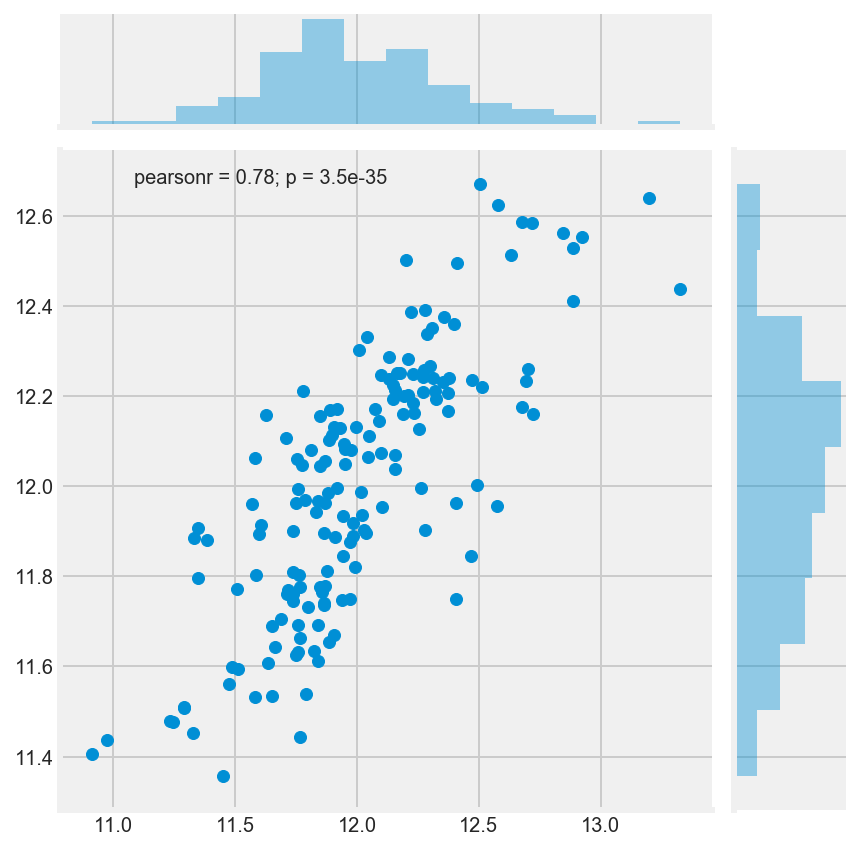

In [77]:
print(sns.regplot(y_test, ridge_pred ),sns.jointplot(y_test, ridge_pred)) #As seen through the regplot , the y-predicted is in line with y-test and relationship is quite high.

# Residual

In [78]:
resid=abs(y_test-ridge_pred) # The residuals represent the variance remaining in the saleprice not 
                                # accounted for by the predictors in my model 

In [79]:
from sklearn.metrics import mean_squared_error
MSE1=mean_squared_error(y_test, ridge_pred )
print(MSE1) #residual left

0.061911501517579674


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

# Train -Test-Fit the model

 I'm now going to rerun the model this time with both fixed and chanebale factors to find the residual.
Next i will compare the MSE of the two models and find out how much the changeable variables could contribute to the price.

In [80]:

data2=house[['SalePrice_log','YrSold','GarageCars', 'YearRemodAdd', 'YearBuilt', 'Foundation', 'HouseStyle', 'BedroomAbvGr','Neighborhood','ExterCond','CentralAir','OverallQual','ExterQual','GarageQual','GarageCond','HeatingQC','FireplaceQu','KitchenQual','RoofMatl','RoofStyle']]


predictors=['ExterCond','CentralAir','OverallQual','ExterQual','GarageQual','GarageCond','HeatingQC','FireplaceQu','KitchenQual','RoofMatl','RoofStyle','GarageCars',  'YearRemodAdd', 'YearBuilt', 'Foundation', 'HouseStyle', 'BedroomAbvGr','Neighborhood']

X_train=data2[data2['YrSold'] <2010]
X_train=X_train[predictors]

ss = StandardScaler()
X_train = ss.fit_transform(X_train)# use the "fit_transform" function to standardize the X  matrix

y_train=data2[data2['YrSold']<2010]
y_train=y_train.SalePrice_log.values



X_test=data2[data2['YrSold'] ==2010]
X_test=X_test[predictors]
X_test = ss.transform(X_test)# we have already fit ther model ,so inorder to standradize in the same way, we need to not fit it again

y_test=data2[data2['YrSold'] ==2010]
y_test=y_test.SalePrice_log.values


# Optimal Alpha

In [81]:
#Find an optimal value for Ridge regression alpha using RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge2 = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge2.fit(X_train, y_train)

print(optimal_ridge2.alpha_)

30.36771118035459


In [82]:
ridge_pred2 = optimal_ridge2.predict(X_test)

optimal_ridge2.score(X_test, y_test)#the r-square is high which proves that when you add features to fixed variables, the amaount of avriance explaining the sales price increases.


0.7938484073486883

In [83]:
resids_var2 = abs(y_test-ridge_pred2)

AxesSubplot(0.08,0.125;0.87x0.755)


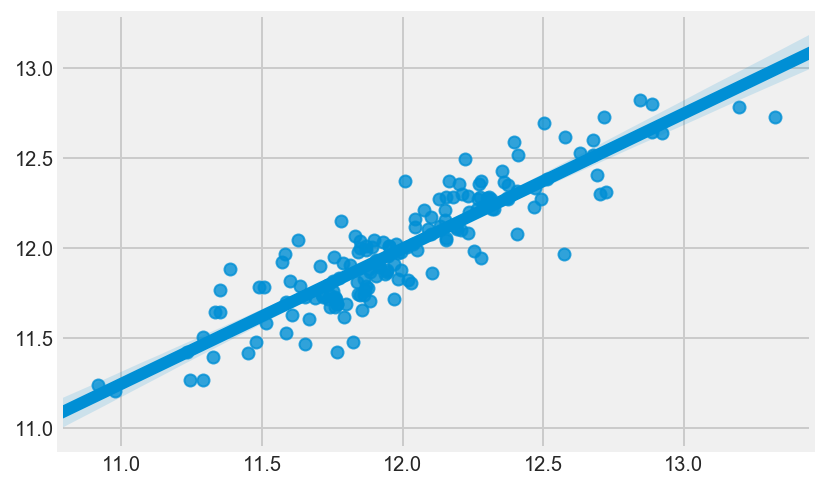

In [84]:
print(sns.regplot(y_test,ridge_pred2))

In [85]:
list(zip(optimal_ridge2.coef_,predictors)) 

[(-0.008247139351607114, 'ExterCond'),
 (-0.026645574178788708, 'CentralAir'),
 (0.16278692867048297, 'OverallQual'),
 (-0.025463733822346474, 'ExterQual'),
 (-0.016093982146773093, 'GarageQual'),
 (-0.0017639853758676827, 'GarageCond'),
 (-0.019000549207942106, 'HeatingQC'),
 (0.0024722418962396407, 'FireplaceQu'),
 (-0.04376604723745845, 'KitchenQual'),
 (0.012299022254219114, 'RoofMatl'),
 (0.012299022254219165, 'RoofStyle'),
 (0.09352873462325223, 'GarageCars'),
 (0.02014720621430442, 'YearRemodAdd'),
 (0.020838073260892143, 'YearBuilt'),
 (-0.0002847327119342887, 'Foundation'),
 (0.0022012951111158485, 'HouseStyle'),
 (0.05903535303065412, 'BedroomAbvGr'),
 (0.017141174446410508, 'Neighborhood')]

In [86]:
list(zip(100 * optimal_ridge2.coef_,predictors))


[(-0.8247139351607113, 'ExterCond'),
 (-2.664557417878871, 'CentralAir'),
 (16.278692867048296, 'OverallQual'),
 (-2.5463733822346475, 'ExterQual'),
 (-1.6093982146773094, 'GarageQual'),
 (-0.17639853758676827, 'GarageCond'),
 (-1.9000549207942106, 'HeatingQC'),
 (0.24722418962396406, 'FireplaceQu'),
 (-4.376604723745845, 'KitchenQual'),
 (1.2299022254219114, 'RoofMatl'),
 (1.2299022254219165, 'RoofStyle'),
 (9.352873462325222, 'GarageCars'),
 (2.014720621430442, 'YearRemodAdd'),
 (2.0838073260892145, 'YearBuilt'),
 (-0.02847327119342887, 'Foundation'),
 (0.22012951111158485, 'HouseStyle'),
 (5.903535303065412, 'BedroomAbvGr'),
 (1.7141174446410508, 'Neighborhood')]

It is interesting to see external condition, centeralairor garage quality have negative impact on the price.For each unit increase in Overal quality,it willbe less thant 16% increase in the price of house. Size of garage is another important factor which increase the price by 10%.

In [87]:
from sklearn.metrics import mean_squared_error
MSE2=mean_squared_error(y_test, ridge_pred2 )

In [88]:
(MSE1-MSE2)/MSE1# the new features can explain the 47% variance which was shown as residual.this means if not fixed variables have been addedas the predictors of the price , the could increase price by 47%.

0.47225801630214376

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

model identify feature contribute to sell
which feature predict-model classification
how others were ealth with the prblem in the past
which featues are the best
